===== DESCRIPTIVE STATISTICS =====
Mean: 123650.48
Median: 97955.5
Mode: 6540
Standard Deviation: 100161.08527499212


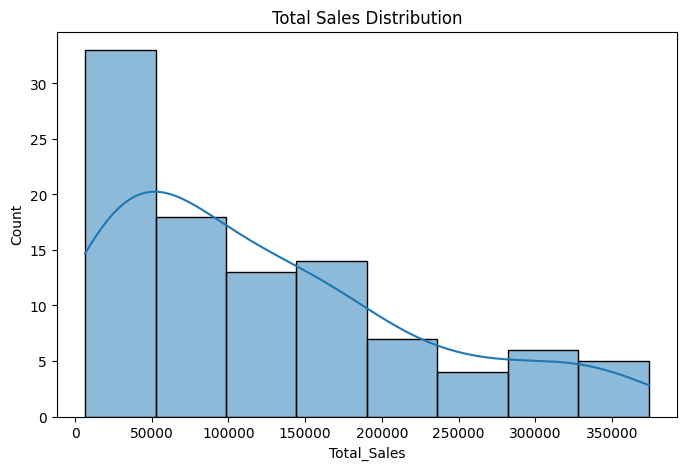


===== CORRELATION MATRIX =====
             Quantity     Price  Total_Sales
Quantity     1.000000  0.008014     0.688107
Price        0.008014  1.000000     0.646131
Total_Sales  0.688107  0.646131     1.000000


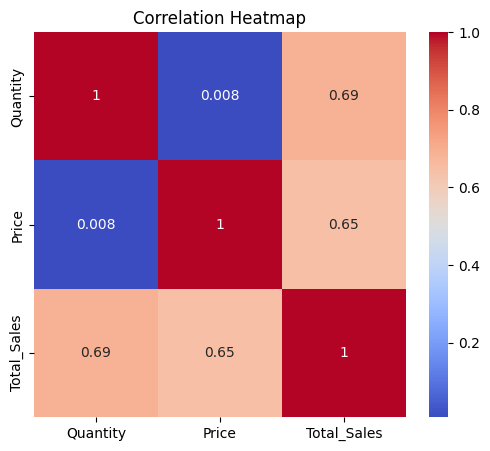


===== HYPOTHESIS TESTING =====
T-Test p-value: 1.4675017262182455e-27
ANOVA p-value: 1.467501726218228e-27

95% Confidence Interval: (103776.34767158539, 143524.6123284146)

Regression R-squared: 0.41748520826938107


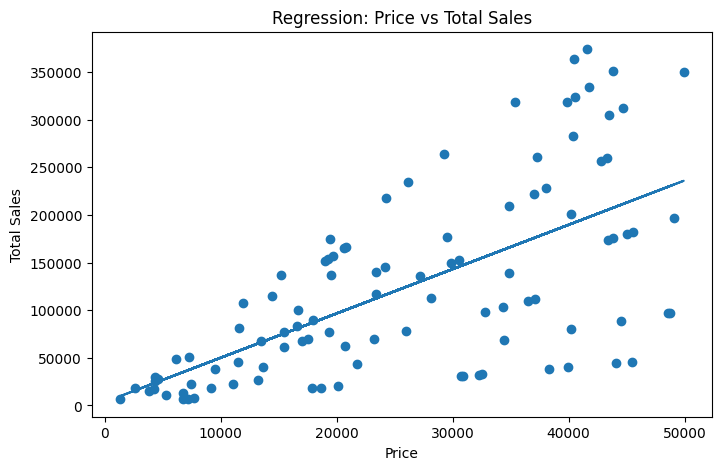


Statistical Analysis Completed Successfully!


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load datasets
sales_df = pd.read_csv("sales_data (2).csv")
churn_df = pd.read_csv("customer_churn.csv")

# Convert Date column
sales_df['Date'] = pd.to_datetime(sales_df['Date'], errors='coerce')

print("===== DESCRIPTIVE STATISTICS =====")

mean_sales = sales_df['Total_Sales'].mean()
median_sales = sales_df['Total_Sales'].median()
mode_sales = sales_df['Total_Sales'].mode()[0]
std_sales = sales_df['Total_Sales'].std()

print(f"Mean: {mean_sales}")
print(f"Median: {median_sales}")
print(f"Mode: {mode_sales}")
print(f"Standard Deviation: {std_sales}")

# Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(sales_df['Total_Sales'], kde=True)
plt.title("Total Sales Distribution")
plt.show()

# -----------------------------
# Correlation Matrix
# -----------------------------
print("\n===== CORRELATION MATRIX =====")

corr = sales_df.corr(numeric_only=True)
print(corr)

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# Hypothesis Testing
# -----------------------------
print("\n===== HYPOTHESIS TESTING =====")

group1 = sales_df[sales_df['Total_Sales'] > mean_sales]['Total_Sales']
group2 = sales_df[sales_df['Total_Sales'] <= mean_sales]['Total_Sales']

t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-Test p-value: {p_value}")

anova = stats.f_oneway(group1, group2)
print(f"ANOVA p-value: {anova.pvalue}")

# -----------------------------
# Confidence Interval
# -----------------------------
confidence = 0.95
n = len(sales_df['Total_Sales'])
se = stats.sem(sales_df['Total_Sales'])
margin = se * stats.t.ppf((1 + confidence) / 2., n-1)

lower = mean_sales - margin
upper = mean_sales + margin

print(f"\n95% Confidence Interval: ({lower}, {upper})")

# -----------------------------
# Regression (Price vs Total Sales)
# -----------------------------
if 'Price' in sales_df.columns:
    X = sales_df[['Price']]
    y = sales_df['Total_Sales']
    
    model = LinearRegression()
    model.fit(X, y)
    
    predictions = model.predict(X)
    r2 = r2_score(y, predictions)
    
    print(f"\nRegression R-squared: {r2}")
    
    plt.figure(figsize=(8,5))
    plt.scatter(X, y)
    plt.plot(X, predictions)
    plt.title("Regression: Price vs Total Sales")
    plt.xlabel("Price")
    plt.ylabel("Total Sales")
    plt.show()

print("\nStatistical Analysis Completed Successfully!")
